<a href="https://colab.research.google.com/github/yeonseocho/Introduce-to-Machine-Learning-with-Python/blob/master/eigenface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

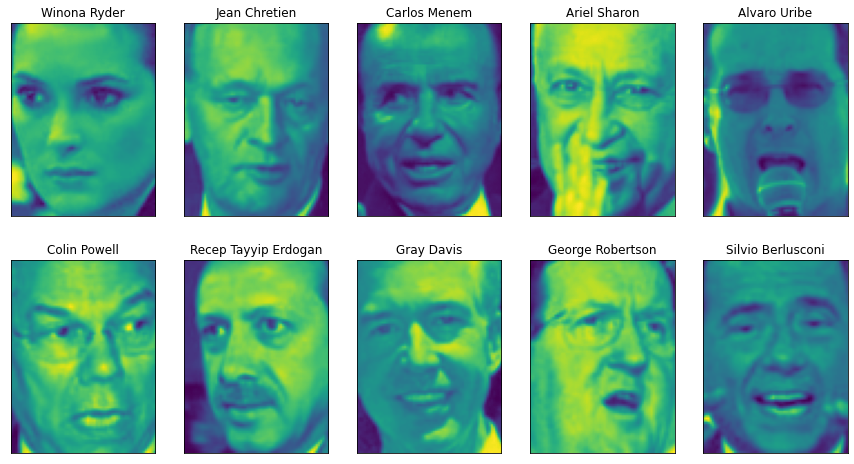

In [30]:

from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

fig, axes=plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image,ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [29]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
!pip install --target=$my_path mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
print("people.images.shape:",people.images.shape)
print("클래스 개수: ", len(people.target_names))

people.images.shape: (3023, 87, 65)
클래스 개수:  62


In [12]:
import numpy as np

In [13]:
# 각 타깃이 나타난 횟수 계산
counts=np.bincount(people.target)
# 타깃별 이름고 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25}{1:3}".format(name, count), end='   ')
  if(i+1)%3==0:
     print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

In [14]:
mask=np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/225.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


In [16]:
import mglearn

In [17]:
from sklearn.model_selection import train_test_split


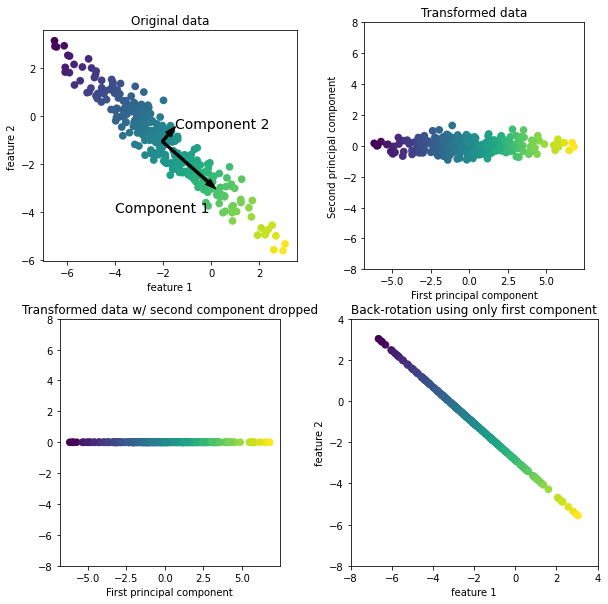

In [19]:
mglearn.plots.plot_pca_illustration()

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [23]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도:{:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도:0.31


In [24]:
print("pca.component_.shape", pca.components_.shape)

pca.component_.shape (100, 5655)


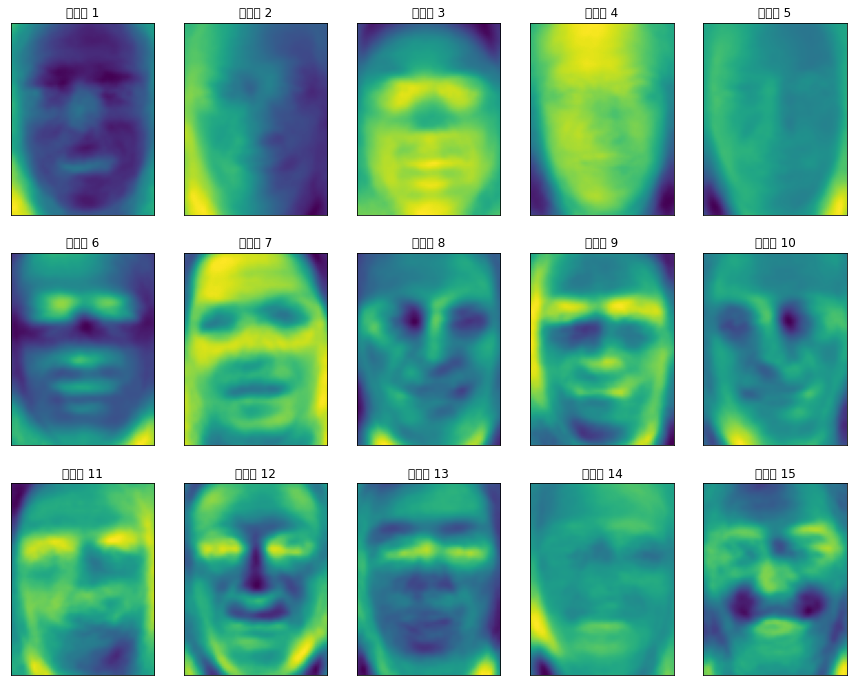

In [31]:
fig, axes=plt.subplots(3,5, figsize=(15, 12), 
                       subplot_kw={'xticks':(), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("주성분 {}".format((i+1)))


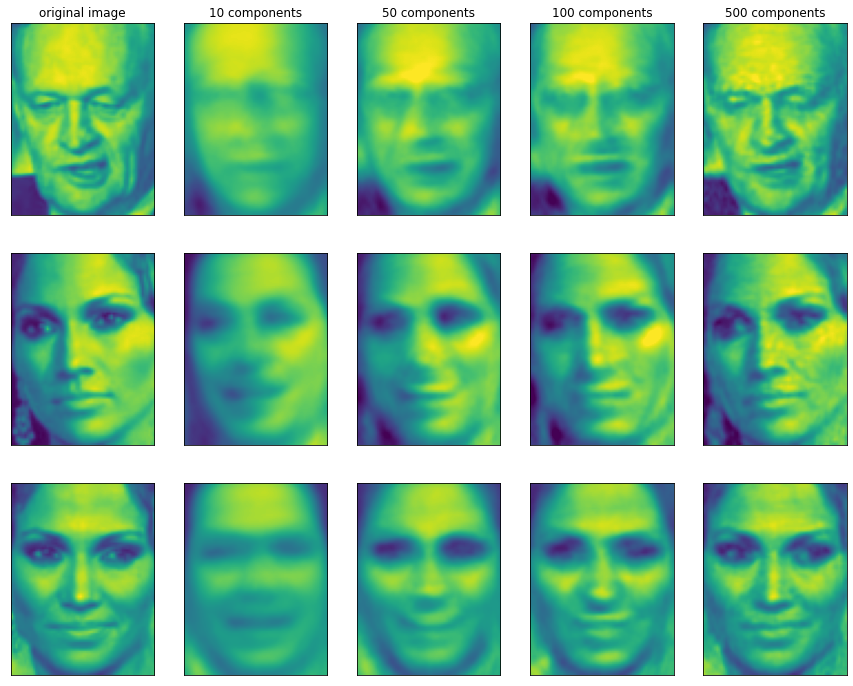

In [32]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두번째 주성분')

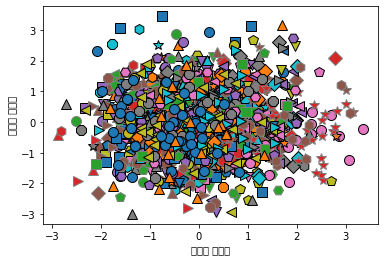

In [33]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:,1], y_train)
plt.xlabel("첫번째 주성분")
plt.ylabel("두번째 주성분")

In [36]:
np.sum(pca.explained_variance_ratio_)

0.9027754

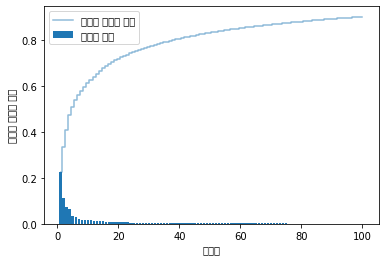

In [40]:
plt.bar(range(1,101), pca.explained_variance_ratio_, align='center',label='설명된 분산')
plt.step(range(1,101), np.cumsum(pca.explained_variance_ratio_), alpha=0.5, where='mid', label='설명된 분산의 누적')
plt.ylabel('설명된 분산의 비율')
plt.xlabel('주성분')
plt.legend()
plt.show()

In [43]:
pca=PCA(n_components=40, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.32


In [45]:
pca=PCA(n_components=0.8, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca, y_test)))
print("주성분 개수: ", pca.n_components_)

테스트 세트 정확도: 0.30
주성분 개수:  38


In [46]:
### 비음수 행렬 분해(NMF)

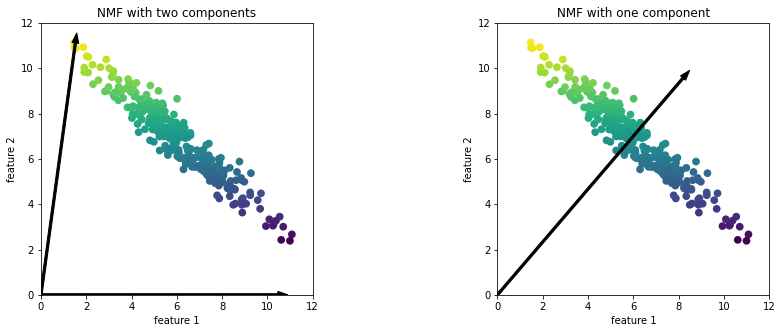

In [48]:
mglearn.plots.plot_nmf_illustration()

In [50]:
mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.607407, ..., 0.275556],
       ...,
       [0.048889, ..., 0.675556]], dtype=float32), 
array([[0.26963 , ..., 0.305185],
       ...,
       [0.133333, ..., 0.694815]], dtype=float32))


KeyboardInterrupt: ignored

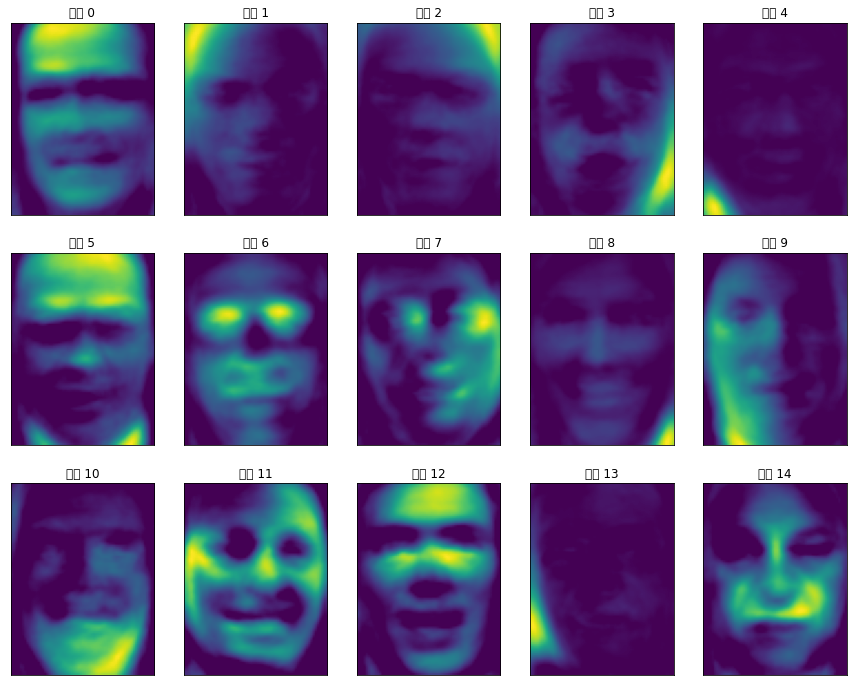

In [52]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15, init='nndsvd', random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)

fig, axes=plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title("성분 {}".format(i))
